In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download()
from nltk.corpus import movie_reviews
import string 
import re

from tqdm.notebook import tqdm_notebook, tqdm
tqdm_notebook.pandas()

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Package bllip_wsj_no_aux is already up-to-date!
       | Downloading package book_grammars to /root/nltk_data..


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
len(movie_reviews.words()) # total number of words

1583820

In [ ]:
movie_reviews.categories() # number of categories

['neg', 'pos']

In [ ]:
documents = []

for category in movie_reviews.categories():
	for fileid in movie_reviews.fileids(category):
		documents.append((movie_reviews.words(fileid), category))

print(len(documents))
print(documents[0])

from random import shuffle 
shuffle(documents)

2000
(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], 'neg')


In [ ]:
docs = [" ".join(i[0]) for i in documents]
categories = [i[1] for i in documents]
df = pd.DataFrame({"Text":docs, "Target":categories})
df.head()

,Text,Target
0,it ' s been a good long while since we had a g...,pos
1,capsule : the director of cure brings a weird ...,pos
2,i find most of television so intensely boring ...,pos
3,senseless ( r ) marlon wayans is a very talent...,neg
4,i am continually amazed at movies like this . ...,neg


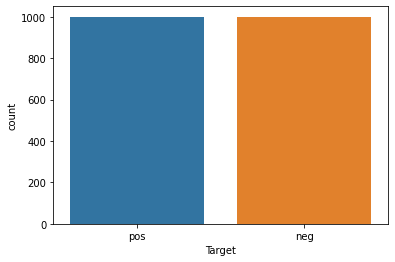

In [ ]:
sns.countplot(x="Target", data=df)

In [ ]:
all_words = [word.lower() for word in movie_reviews.words()]

print(all_words[:10])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']


In [ ]:
all_words_frequency = nltk.FreqDist(all_words)

print(all_words_frequency)
print(all_words_frequency.most_common(10))

<FreqDist with 39768 samples and 1583820 outcomes>
[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


From the above frequency distribution of words, we can see the most frequently occurring words are either punctuation marks or stopwords.

## **Data Preprocessing**

In [ ]:
print(df['Text'][0])

it ' s been a good long while since we had a good old fashioned thriller , where mostly everything goes right for the audience and wrong for the characters , but it ' s been even longer since i saw a thriller that actually * shock * cared for the characters , not merely judged them but actually allowed their human foibles , flaws , and strengths to emerge so radiantly . i ' d saw that it ' s been at least a couple decades , even as far back to the great hitchcock thrillers , though i ' m hardly comparing " a simple plan " to , say , " rear window " or " strangers on a train . " yet it ' s almost as good . it ' s simple , yet strangely complex , and astonishingly rewarding , because instead of moving from plot point to plot point , and merely laying out they - might - be - caught overtones , it instead concerns itself with the moral corruption and depths of greed that its protagonists can go to , all without ever judging them as either evil or even immoral . elegantly directed by sam ra

In [ ]:
stopwords_ = set(nltk.corpus.stopwords.words('english'))
print((", ").join(stopwords_))

def stopwords_removal(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_])

tqdm.pandas()
df['Text'] = df['Text'].progress_apply(lambda text: stopwords_removal(text))

it, until, had, re, didn't, did, s, if, both, while, after, some, each, same, yourselves, only, hasn't, most, then, shan't, with, weren't, down, where, few, m, that'll, been, when, them, itself, our, in, own, didn, ain, hasn, wouldn't, couldn't, having, below, for, weren, ours, wouldn, which, isn, an, during, were, just, too, themselves, and, shouldn't, myself, who, over, whom, through, not, y, you, doing, me, because, above, will, hadn't, as, o, aren't, aren, any, needn't, shan, was, am, hadn, haven't, don't, haven, into, about, should, why, that, you're, from, no, mightn't, my, all, up, those, so, she, it's, they, yourself, further, at, wasn, how, again, its, here, to, are, ma, hers, mustn't, mustn, of, her, does, i, the, out, than, his, by, this, against, your, under, d, on, t, herself, isn't, what, very, other, yours, be, have, you've, you'll, you'd, him, needn, being, a, ourselves, is, off, ve, should've, but, has, he, do, or, mightn, won't, himself, these, now, before, don, she's

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
print("After removal of stopwords: ")

print(df['Text'][0])

After removal of stopwords: 
' good long since good old fashioned thriller , mostly everything goes right audience wrong characters , ' even longer since saw thriller actually * shock * cared characters , merely judged actually allowed human foibles , flaws , strengths emerge radiantly . ' saw ' least couple decades , even far back great hitchcock thrillers , though ' hardly comparing " simple plan " , say , " rear window " " strangers train . " yet ' almost good . ' simple , yet strangely complex , astonishingly rewarding , instead moving plot point plot point , merely laying - might - - caught overtones , instead concerns moral corruption depths greed protagonists go , without ever judging either evil even immoral . elegantly directed sam raimi ( yes , ) , " simple plan " concerns discovery crashed plane within bag full millions dollars upright , moderately financially stable working man ( bill paxton ) , dim - witted brother ( billy bob thornton ) , drinking buddy ( brent briscoe ) 

In [ ]:
def cleaning_numbers(text):
    return re.sub('[0-9]+', '', text)

df['Text'] = df['Text'].apply(lambda text: cleaning_numbers(text))

In [ ]:
def cleaning_punctuations(text):
    return " ".join([word for word in str(text).split() if word not in string.punctuation])

tqdm.pandas()
df['Text'] = df['Text'].progress_apply(lambda text: cleaning_punctuations(text))

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
print("After removal of punctuations: ")

print(df['Text'][0])

After removal of punctuations: 
good long since good old fashioned thriller mostly everything goes right audience wrong characters even longer since saw thriller actually shock cared characters merely judged actually allowed human foibles flaws strengths emerge radiantly saw least couple decades even far back great hitchcock thrillers though hardly comparing simple plan say rear window strangers train yet almost good simple yet strangely complex astonishingly rewarding instead moving plot point plot point merely laying might caught overtones instead concerns moral corruption depths greed protagonists go without ever judging either evil even immoral elegantly directed sam raimi yes simple plan concerns discovery crashed plane within bag full millions dollars upright moderately financially stable working man bill paxton dim witted brother billy bob thornton drinking buddy brent briscoe without anyone around possibility one would come looking three debate debate finally reach decision yes

In [ ]:
for i in range(len(df)):
  if df["Target"][i] == 'pos':
    df["Target"][i] = 1
  else:
    df["Target"][i] = 0


df["Target"] = df["Target"].astype('int')

## Visualizing Words in Positive & Negative Tweet Texts

In [ ]:
def wordcloud_draw(data, title):
  words = " ".join(data)
  wordcloud = WordCloud(background_color='white', max_words = 1000 , 
                        width = 1200 , height = 300, collocation_threshold = 2, 
                        collocations= True,).generate(words)
  plt.figure(figsize = (20,20))
  plt.imshow(wordcloud)
  plt.title(title, fontsize=20)
  plt.axis('off')

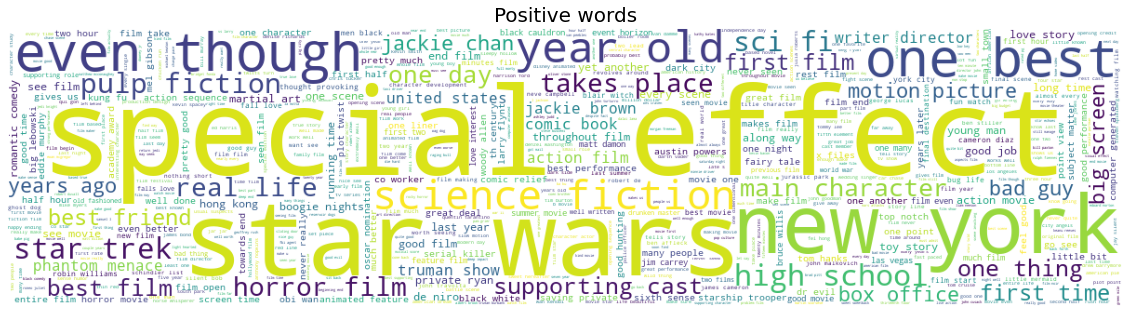

In [ ]:
wordcloud_draw(df['Text'][df['Target']==1],'Positive words')

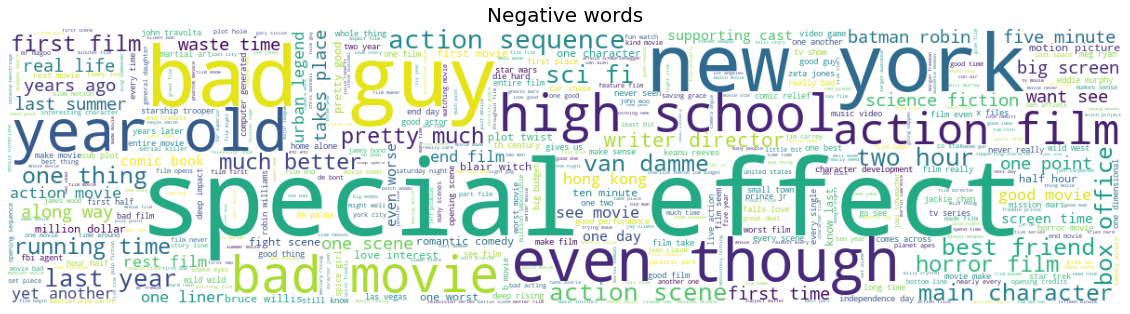

In [ ]:
wordcloud_draw(df['Text'][df['Target']==0],'Negative words')

## Splitting Data Train & Test sets

In [ ]:
X = df['Text']
y = df["Target"].astype("int")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =5)

In [ ]:
X_train

733     never star trek fan tell truth five films seri...
559     except bright moments good verbal comedy old f...
1993    camera zooms incredibly close focuses closed e...
977     note may consider portions following text spoi...
404     rocks actually lots rocks fly us us slow fast ...
                              ...                        
1142    full monty whole lot fun wacky witty original ...
998     battle dreamworks versus disney earlier year m...
1725    historical epic genre almost banished hollywoo...
206     seeing outrageous previews bulworth one wonder...
867     summer recently saved two different movies ope...
Name: Text, Length: 1800, dtype: object

## TF-IDF Vectorization

In [ ]:
vectoriser = TfidfVectorizer()
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  37424


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [ ]:
X_train

<1800x37424 sparse matrix of type '<class 'numpy.float64'>'
	with 480162 stored elements in Compressed Sparse Row format>

## Model Building

In [ ]:
def model_evaluate(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  # Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values")
  plt.ylabel("Actual values")
  plt.title ("Confusion Matrix")
  plt.show()

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        94
           1       0.87      0.84      0.86       106

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



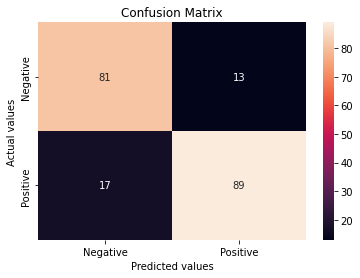

f1-score 85.01201923076923


In [ ]:
LR = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LR.fit(X_train, y_train)
model_evaluate(LR)
y_pred1 = LR.predict(X_test)
print("f1-score", f1_score(y_test, y_pred1, average="weighted")*100)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        94
           1       0.88      0.87      0.88       106

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



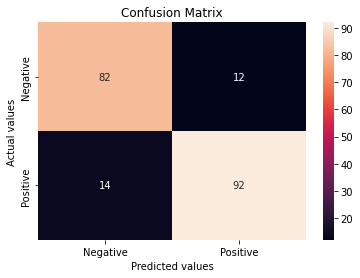

0.8700651629072681


In [ ]:
SVC = LinearSVC()
SVC.fit(X_train, y_train)
model_evaluate(SVC)
y_pred2 = SVC.predict(X_test)
print(f1_score(y_test, y_pred2, average="weighted"))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77        94
           1       0.83      0.71      0.77       106

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



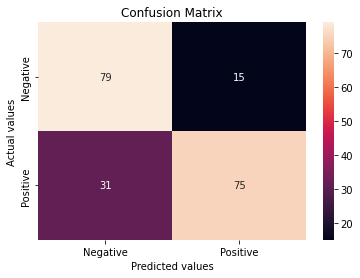

0.7696318527410964


In [ ]:
RF = RandomForestClassifier(n_estimators=200, max_depth=15)
RF.fit(X_train, y_train)
model_evaluate(RF)
y_pred3 = RF.predict(X_test)
print(f1_score(y_test, y_pred3, average="weighted"))

**Linear SVM has the best overall accuracy of 87% and also the best f1-scores of 0.86**

**Hence, we can conclude that Linear SVC is the best performing model in this case**